# Heart Failure Prediction

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading data

In [2]:
df=pd.read_csv("C:/Users/INDIA/Downloads/heart_failure.csv")# Reading the dataset

# Analysing the data

In [3]:
df.head() # Describes the data related information 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape
# Identifying the shape of the data which gives information related to number of records present in the dataset.

(299, 13)

In [5]:
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)

In [6]:
df.head() # Describes the data related information 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [7]:
df.info()  # Describes the data related information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    int32  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 28.2 KB


In [8]:
df.describe() # Decribes the features int eh dataset wiht some required information

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


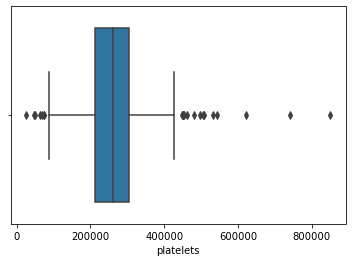

In [9]:
sns.boxplot(x = df['platelets'])
plt.show()

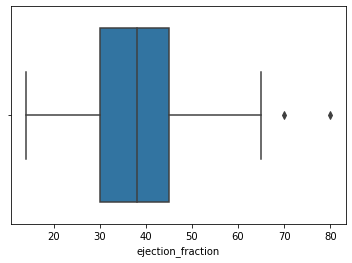

In [10]:
sns.boxplot(x = df['ejection_fraction'])
plt.show()

In [11]:
def normalize(df):
    max = df.max
    min = df.min
    mean = df.mean()
    df = (df - mean) / (max - min)
    return df


d = df['ejection_fraction']
e = (d - d.mean()) / (d.std())

In [12]:
df['ejection_fraction'] = e

In [13]:
df.head() # Describes the data related information 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,-1.527998,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,-0.007065,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,-1.527998,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,-1.527998,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,-1.527998,0,327000,2.7,116,0,0,8,1


In [14]:
df['platelets'] = (df['platelets'] - df['platelets'].mean()) / (df['platelets'].std())

In [15]:
df.head()  # Describes the data related information 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,-1.527998,1,1.678837e-02,1.9,130,1,0,4,1
1,55,0,7861,0,-0.007065,0,-2.735654e-07,1.1,136,1,0,6,1
2,65,0,146,0,-1.527998,0,-1.036336e+00,1.3,129,1,1,7,1
3,50,1,111,0,-1.527998,0,-5.455595e-01,1.9,137,1,0,7,1
4,65,1,160,1,-1.527998,0,6.507077e-01,2.7,116,0,0,8,1


In [16]:
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean()) / (df['serum_sodium'].std())

In [17]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,-1.527998,1,1.678837e-02,1.9,-1.501519,1,0,4,1
1,55,0,7861,0,-0.007065,0,-2.735654e-07,1.1,-0.141739,1,0,6,1
2,65,0,146,0,-1.527998,0,-1.036336e+00,1.3,-1.728149,1,1,7,1
3,50,1,111,0,-1.527998,0,-5.455595e-01,1.9,0.084892,1,0,7,1
4,65,1,160,1,-1.527998,0,6.507077e-01,2.7,-4.674340,0,0,8,1


In [18]:
y = df.DEATH_EVENT


In [19]:
df.head()  # Describes the data related information 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,-1.527998,1,1.678837e-02,1.9,-1.501519,1,0,4,1
1,55,0,7861,0,-0.007065,0,-2.735654e-07,1.1,-0.141739,1,0,6,1
2,65,0,146,0,-1.527998,0,-1.036336e+00,1.3,-1.728149,1,1,7,1
3,50,1,111,0,-1.527998,0,-5.455595e-01,1.9,0.084892,1,0,7,1
4,65,1,160,1,-1.527998,0,6.507077e-01,2.7,-4.674340,0,0,8,1


In [20]:
x=df.drop(["DEATH_EVENT"],axis=1)

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [22]:
x.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [23]:
y.isna().sum()

0

In [24]:
x.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                          int64
dtype: object

In [25]:
y.dtypes

dtype('int64')

In [26]:
x.shape

(299, 12)

In [27]:
y.shape

(299,)

In [28]:
# Splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
Prediction = lm.predict(x_test)

In [30]:
lm.score(x_train,y_train)

0.43765329833213484

In [31]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train, y_train)

Prediction = log.predict(x_test)

log.score(x_train, y_train)

0.87

In [32]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)

Prediction_SVM = svc.predict(x_test)

svc.score(x_train, y_train)

0.735

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train, y_train)

Prediction_KNC = knn.predict(x_test)

knn.score(x_train, y_train)

1.0

In [34]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

gaussian.fit(x_train, y_train)

Prediction_G = gaussian.predict(x_test)

gaussian.score(x_train, y_train)

0.825

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(x_train, y_train)

Prediction_GBC = gradient_boost.predict(x_test)

gradient_boost.score(x_train, y_train)

1.0

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
RFC_prediction = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

1.0